## Instruction

Due to an error that happened when I tried to import some Python Libraries into JupyterNotebook, to Tackle this.
I used Google Collab to run the function and the Code.
Please follow the following instructions if there is still trouble to run the Code

In [ ]:
pip install tensorflow==2.8.0 #In order to run the code, it has to be this specific version

In [ ]:
pip install scikeras==0.10.0 #In order to run the code, it has to be this specific version

In [2]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Read Data 

In [4]:
data = pd.read_csv('clean_data.csv')
display(data)

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


## Data Preprocessing 

### Handling Missing Value using MICE and Chose Spesific Dataset

In [5]:
def handling_missing_value(data_forecast, state, sector):
    data_forecast = data[(data["stateDescription"] == state) & (data["sectorName"] == sector)]
    display(data_forecast)
    data_forecast = data_forecast.drop(columns = ["stateDescription","sectorName"])
    missing_values_count = data_forecast.isna().sum().sum()
    if missing_values_count == 0 :
        print("There is no missing value in this state description and sector")
        print()
        pass
    
    else:
        print("There is missing value in this state description and sector")
        display(data_forecast.isna().sum())
        imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42)
        data_forecast_imputed = pd.DataFrame(imputer.fit_transform(data_forecast), columns=data_forecast.columns)

    
    return data_forecast_imputed 

## Put state location and sector name 
state = "Arizona"
sector_name = "residential"

data_handle_missing_value = handling_missing_value(data,state ,sector_name)
data_handle_missing_value

,year,month,stateDescription,sectorName,customers,price,revenue,sales
196,2001,1,Arizona,residential,NaN,6.99,144.17362,2062.58925
340,2001,2,Arizona,residential,NaN,7.13,127.61224,1790.02439
728,2001,3,Arizona,residential,NaN,7.40,125.08726,1690.14640
1003,2001,4,Arizona,residential,NaN,8.09,113.63141,1404.35627
1321,2001,5,Arizona,residential,NaN,9.41,186.67238,1983.73952
...,...,...,...,...,...,...,...,...
84519,2023,9,Arizona,residential,3044019.0,14.39,558.12683,3878.04506
84697,2023,10,Arizona,residential,3053945.0,14.52,432.57754,2979.15832
85096,2023,11,Arizona,residential,3064573.0,14.53,306.02441,2105.80603
85500,2023,12,Arizona,residential,3070519.0,14.41,346.28693,2403.65969


There is missing value in this state description and sector


year          0
month         0
customers    84
price         0
revenue       0
sales         0
dtype: int64

,year,month,customers,price,revenue,sales
0,2001.0,1.0,2537738.06,6.99,144.17362,2062.58925
1,2001.0,2.0,2536762.19,7.13,127.61224,1790.02439
2,2001.0,3.0,2536850.97,7.40,125.08726,1690.14640
3,2001.0,4.0,2536513.30,8.09,113.63141,1404.35627
4,2001.0,5.0,2537278.81,9.41,186.67238,1983.73952
...,...,...,...,...,...,...
272,2023.0,9.0,3044019.00,14.39,558.12683,3878.04506
273,2023.0,10.0,3053945.00,14.52,432.57754,2979.15832
274,2023.0,11.0,3064573.00,14.53,306.02441,2105.80603
275,2023.0,12.0,3070519.00,14.41,346.28693,2403.65969


### Handling Outlier using IQR

In [6]:
def handling_outlier(df,q1,q3,k):
    for i in df.drop(columns=['year','month']):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df.drop(columns=['year','month']), x=i)

    #outliers = pd.DataFrame(columns=df.columns)
    #total_outliers = []

    for column in df.drop(columns=['year','month']):
        Q1 = df[column].quantile(q1)
        Q3 = df[column].quantile(q3)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Identify outliers
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        print(f"Outliers in colums {column}")
        display(df[outlier_mask])
        
        #total_outliers.append(df[outlier_mask])

        # Clip them
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    #total_outliers = pd.concat(total_outliers)
    #display(total_outliers)
    
    return df


Outliers in colums customers


,year,month,customers,price,revenue,sales


Outliers in colums price


,year,month,customers,price,revenue,sales


Outliers in colums revenue


,year,month,customers,price,revenue,sales
258,2022.0,7.0,3006815.0,13.08,675.05894,5160.66421
270,2023.0,7.0,3030784.0,14.12,816.95693,5786.96033
271,2023.0,8.0,3035941.0,13.82,730.12878,5281.54649


Outliers in colums sales


,year,month,customers,price,revenue,sales
270,2023.0,7.0,3030784.0,14.12,672.539045,5786.96033


,year,month,customers,price,revenue,sales
0,2001.0,1.0,2537738.06,6.99,144.17362,2062.58925
1,2001.0,2.0,2536762.19,7.13,127.61224,1790.02439
2,2001.0,3.0,2536850.97,7.40,125.08726,1690.14640
3,2001.0,4.0,2536513.30,8.09,113.63141,1404.35627
4,2001.0,5.0,2537278.81,9.41,186.67238,1983.73952
...,...,...,...,...,...,...
272,2023.0,9.0,3044019.00,14.39,558.12683,3878.04506
273,2023.0,10.0,3053945.00,14.52,432.57754,2979.15832
274,2023.0,11.0,3064573.00,14.53,306.02441,2105.80603
275,2023.0,12.0,3070519.00,14.41,346.28693,2403.65969


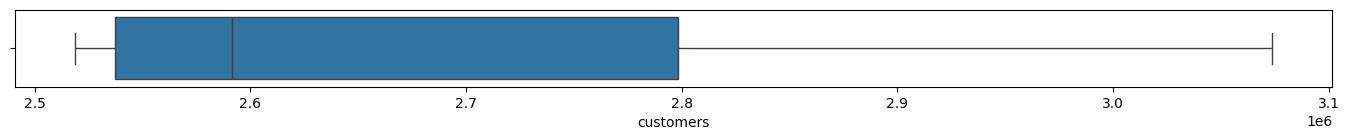

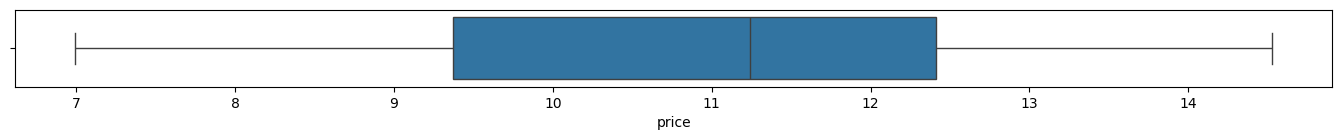

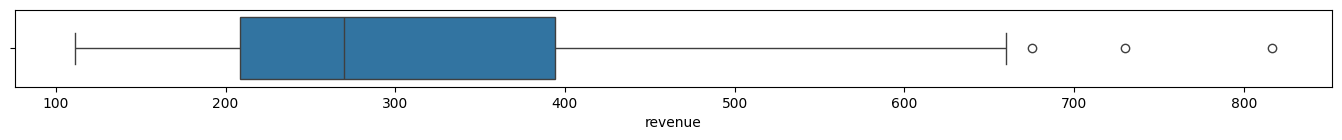

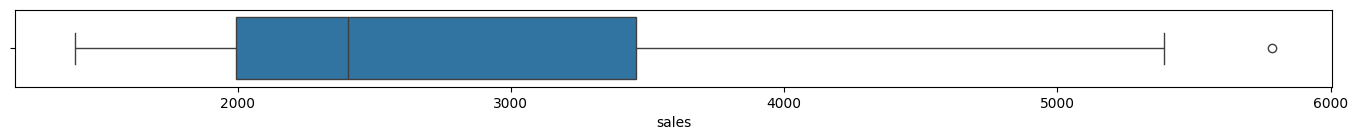

In [7]:
data_handle_outliers = handling_outlier(data_handle_missing_value,0.25,0.75,1.5)
data_handle_outliers

### Train Test Split and Scalling 

In [8]:
data_handle_outliers

,year,month,customers,price,revenue,sales
0,2001.0,1.0,2537738.06,6.99,144.17362,2062.58925
1,2001.0,2.0,2536762.19,7.13,127.61224,1790.02439
2,2001.0,3.0,2536850.97,7.40,125.08726,1690.14640
3,2001.0,4.0,2536513.30,8.09,113.63141,1404.35627
4,2001.0,5.0,2537278.81,9.41,186.67238,1983.73952
...,...,...,...,...,...,...
272,2023.0,9.0,3044019.00,14.39,558.12683,3878.04506
273,2023.0,10.0,3053945.00,14.52,432.57754,2979.15832
274,2023.0,11.0,3064573.00,14.53,306.02441,2105.80603
275,2023.0,12.0,3070519.00,14.41,346.28693,2403.65969


In [9]:
def train_test_split_scalling(df, split_time, scaller):
    df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1)).dt.to_period('M')
    x_train = df.iloc[:len(df)-split_time, :]
    y_train = x_train["price"]
    x_train = x_train.drop(columns = "price")

    x_test = df.iloc[len(df)-split_time:, :]
    y_test = x_test["price"]
    x_test = x_test.drop(columns = "price")
    
    if scaller == "standard scaller":
        scaller = StandardScaler()
        
    elif scaller == "minmax scaller":
        scaller = MinMaxScaler()
        
    elif scaller == "robut scaller":
        scaller = RobustScaler()
        
    scalling = scaller
    x_train_scalled = scalling.fit_transform (x_train.drop(columns = "year_month"))
    x_test_scalled = scalling.transform(x_test.drop(columns = "year_month"))

    return x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test

    
    

In [11]:
split_time = 24   # Equal with the number of the month for testing data

x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test = train_test_split_scalling(data_handle_outliers, split_time, 'minmax scaller') #Change Scalling

## Machine Learning 

### Linear Regression

In [12]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

linear_regressor = LinearRegression()
grid_search = GridSearchCV(estimator=linear_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_linear_regressor = grid_search.best_estimator_
predictions_linear = best_linear_regressor.predict(x_test_scalled)
predictions_linear = predictions_linear.tolist()

print(predictions_linear)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'copy_X': True, 'fit_intercept': True}
[12.116407803109238, 12.11078989687082, 12.509411680888356, 13.010025474653057, 13.735520295933554, 13.966099820393795, 13.85703159436466, 13.632791050710733, 12.730026934481089, 12.359845344317922, 12.31270704130976, 12.402654542828818, 12.488944283894188, 12.705427969312709, 13.090730795481281, 13.815466098598618, 14.264998452313304, 12.90059988652249, 13.779576477276036, 14.552491834434882, 13.874054530125028, 13.110360622121902, 13.304694716495774, 13.317743509966093]


### Random Forest

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best estimator to make predictions
best_rf_regressor = grid_search.best_estimator_
predictions_rf = best_rf_regressor.predict(x_test_scalled)
predictions_rf = predictions_rf.tolist()

print(predictions_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
[12.079055000000004, 12.074062142857144, 12.662021904761906, 12.86448261904762, 12.64132743589743, 12.593111739926735, 12.588935485347985, 12.610689874847377, 12.544925714285721, 12.219743928571434, 12.496153809523815, 12.417112619047618, 12.374022539682542, 12.660370952380951, 12.775971904761906, 12.856052619047619, 12.718076626984125, 12.593111739926735, 12.54676293040293, 12.635896819291824, 12.579740714285721, 12.690255238095244, 12.609003809523818, 12.428264047619045]


### XGBoost

In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_xgb_regressor = grid_search.best_estimator_
predictions_xgb = best_xgb_regressor.predict(x_test_scalled)
predictions_xgb = predictions_xgb.tolist()
print(predictions_xgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Muhammad Dandi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad Dandi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad Dandi\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Muhammad Dandi\AppData\Roaming\Python\Python311\site-packages\xgboo

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
[12.289907455444336, 12.300375938415527, 12.963849067687988, 13.206780433654785, 12.837188720703125, 12.804603576660156, 12.719237327575684, 12.774821281433105, 12.730006217956543, 12.408226013183594, 12.369170188903809, 12.223367691040039, 12.706396102905273, 12.789556503295898, 13.015847206115723, 13.189690589904785, 12.834370613098145, 12.804603576660156, 12.712604522705078, 12.799766540527344, 12.862151145935059, 12.88072681427002, 12.494303703308105, 12.358820915222168]


## Deep Learning

### MLP

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 500, 1000]
}

mlp_regressor = MLPRegressor(random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_mlp_regressor = grid_search.best_estimator_
predictions_mlp = best_mlp_regressor.predict(x_test_scalled)
predictions_mlp = predictions_mlp.tolist()

print(predictions_mlp)

### LSTM

In [ ]:
X_train_reshaped = np.reshape(x_train_scalled, (x_train_scalled.shape[0], 1, x_train_scalled.shape[1]))
X_test_reshaped = np.reshape(x_test_scalled, (x_test_scalled.shape[0], 1, x_test_scalled.shape[1]))

# Define the model creation function
def create_model(optimizer='adam', units=50, activation='relu'):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(model=create_model, batch_size = 16,epochs = 50,
                       optimizer = "adam",activation='relu',units = 50, verbose=0)  

param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'units': [50, 100],
    'activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_reshaped, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_lstm_model = grid_search.best_estimator_
predictions_lstm = best_lstm_model.predict(X_test_reshaped)
predictions_lstm = predictions_lstm.tolist()

print(predictions_lstm)


### RNN

In [ ]:
X_train_reshaped = np.reshape(x_train_scalled, (x_train_scalled.shape[0], 1, x_train_scalled.shape[1]))
X_test_reshaped = np.reshape(x_test_scalled, (x_test_scalled.shape[0], 1, x_test_scalled.shape[1]))

def create_model(optimizer='adam', units=50, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(model=create_model, batch_size=16, epochs=50,
                       optimizer="adam", activation='relu', units=50, verbose=0)  

param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'units': [50, 100],
    'activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_reshaped, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


best_rnn_model = grid_search.best_estimator_
predictions_rnn = best_rnn_model.predict(X_test_reshaped)
predictions_rnn = predictions_rnn.tolist()

print(predictions_rnn)

## Visualization

In [ ]:
train_visualization = 0 ## For train data

result = [predictions_linear, predictions_rf , predictions_xgb,predictions_mlp,predictions_lstm, predictions_rnn]
for i in range(len(result)):
    
    train_data = data_handle_outliers.iloc[:len(data_handle_outliers)-split_time, :]
    train_data = train_data[["year_month", "price"]]

    test_data = data_handle_outliers.iloc[len(data_handle_outliers)-split_time:, :]
    test_data = test_data[["year_month", "price"]]

    prediction = test_data["year_month"]
    prediction = pd.DataFrame({"year_month": prediction, "Prediction": result[i] })
    
    train_data["year_month"] = train_data["year_month"].dt.to_timestamp()
    test_data["year_month"] = test_data["year_month"].dt.to_timestamp()
    prediction["year_month"] = prediction["year_month"].dt.to_timestamp()
    
    if result[i] == predictions_linear:
        print("Linear Regression Evaluation Metrics:")
        
    elif result[i] == predictions_rf:
        print("Random Forest Evaluation Metrics:")
    
    elif result[i] == predictions_xgb:
        print("XGBoost Evaluation Metrics:")

    elif result[i] == predictions_mlp:
        print("MultiLayer Perceptron Evaluation Metrics:")
        
    elif result[i] == predictions_lstm:
        print("Long Short Term Memory Evaluation Metrics:")
        
    elif result[i] == predictions_rnn:
        print("Recurrent Neural Network Evaluation Metrics:")
        
        
    y_true = test_data["price"]
    y_pred = prediction["Prediction"]
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print()
    
    
    plt.figure(figsize=(26, 6))
    plt.plot(train_data["year_month"].iloc[train_visualization:], train_data["price"].iloc[train_visualization:], label="Training Data", color="blue")
    plt.plot(test_data["year_month"], test_data["price"], label="Test Data", color="green")
    plt.plot(prediction["year_month"], prediction["Prediction"], label="Prediction", color="red")
    
    
    if result[i] == predictions_linear:
        plt.title(f"Linear Regression: Price Predictions Time Series for {state} state in sector name {sector_name}")
        
    elif result[i] == predictions_rf:
        plt.title(f"Random Forest: Price Predictions Time Series for {state} state in sector name {sector_name}")
    
    elif result[i] == predictions_xgb:
        plt.title(f"XGBoost: Price Predictions Time Series for {state} state in sector name {sector_name}")
        
    elif result[i] == predictions_mlp:
        plt.title(f"MultiLayer Perceptron: Price Predictions Time Series for {state} state in sector name {sector_name}")
        
    elif result[i] == predictions_lstm:
        plt.title(f"Long Short Term Memory: Price Predictions Time Series for {state} state in sector name {sector_name}")
        
    elif result[i] == predictions_rnn:
        plt.title(f"Recurrent Neural Network: Price Predictions Time Series for {state} state in sector name {sector_name}")
        
    
    plt.xlabel("DATE")
    plt.ylabel("PRICE")
    plt.legend()
    plt.grid(True)
    plt.show()